In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EMBI

fuente: https://www.bancentral.gov.do/a/d/2585-entorno-internacional

In [2]:
df_embi = pd.read_excel('embi.xlsx')
df_embi.head()

,Fecha,Global,LATINO,REP DOM,Argentina,Bolivia,Brasil,Chile,Colombia,Costa Rica,Ecuador,El Salvador,Guatemala,Honduras,México,Paraguay,Perú,Panamá,Uruguay,Venezuela
0,2007-10-29 00:00:00,2.10117,2.32541,2.28217,3.50066,NaN,1.74591,1.12264,1.60120,NaN,5.97284,1.69250,NaN,NaN,1.25739,NaN,1.45609,1.57240,2.05193,4.01601
1,2007-10-30 00:00:00,2.09184,2.30653,2.28059,3.40902,NaN,1.73399,1.12886,1.57447,NaN,5.95700,1.66766,NaN,NaN,1.26494,NaN,1.45076,1.56610,2.01736,3.99061
2,2007-10-31 00:00:00,2.01050,2.20068,2.13124,3.11642,NaN,1.65654,1.11809,1.47853,NaN,5.75163,1.58238,NaN,NaN,1.20928,NaN,1.36579,1.45827,1.91474,3.82922
3,2007-11-01 00:00:00,2.12474,2.31998,2.22515,3.28787,NaN,1.78215,1.09782,1.60699,NaN,5.90083,1.67401,NaN,NaN,1.30770,NaN,1.45911,1.57267,1.98080,4.01389
4,2007-11-02 00:00:00,2.20092,2.39996,2.31217,3.40686,NaN,1.85498,1.14779,1.68363,NaN,5.95847,1.74595,NaN,NaN,1.37776,NaN,1.52888,1.65530,2.04029,4.12753


In [3]:
df_long_embi = pd.melt(df_embi, id_vars=['Fecha'], var_name = 'Region', value_name ='embi_spread')
df_long_embi

,Fecha,Region,embi_spread
0,2007-10-29 00:00:00,Global,2.10117
1,2007-10-30 00:00:00,Global,2.09184
2,2007-10-31 00:00:00,Global,2.01050
3,2007-11-01 00:00:00,Global,2.12474
4,2007-11-02 00:00:00,Global,2.20092
...,...,...,...
72803,2023-02-23 00:00:00,Venezuela,393.56706
72804,2023-02-24 00:00:00,Venezuela,396.17296
72805,2023-02-27 00:00:00,Venezuela,437.92071
72806,2023-02-28 00:00:00,Venezuela,339.50511


In [4]:
df_long_embi['Region'].unique()

array(['Global', 'LATINO', 'REP DOM', 'Argentina', 'Bolivia', 'Brasil',
       'Chile', 'Colombia', 'Costa Rica', 'Ecuador', 'El Salvador',
       'Guatemala', 'Honduras', 'México', 'Paraguay', 'Perú', 'Panamá',
       'Uruguay', 'Venezuela'], dtype=object)

In [5]:
countries_dict = {'Global':'GLOB', 'LATINO':'LA', 'REP DOM':'DO', 'Argentina':'AR', 'Bolivia':'BO', 'Brasil':'BR',
       'Chile':'CL', 'Colombia':'CO', 'Costa Rica':'CR', 'Ecuador':'EC', 'El Salvador':'SV',
       'Guatemala':'GT', 'Honduras':'HN', 'México':'MX', 'Paraguay':'PY', 'Perú':'PE', 'Panamá':'PA',
       'Uruguay':'UY', 'Venezuela':'VE', 'Brazil':'BR', 'Dominican Republic': 'DO', 'Mexico': 'MX'}

In [6]:
df_long_embi['Pais'] = df_long_embi['Region'].apply(lambda x: countries_dict[x])
df_long_embi.head()

,Fecha,Region,embi_spread,Pais
0,2007-10-29 00:00:00,Global,2.10117,GLOB
1,2007-10-30 00:00:00,Global,2.09184,GLOB
2,2007-10-31 00:00:00,Global,2.01050,GLOB
3,2007-11-01 00:00:00,Global,2.12474,GLOB
4,2007-11-02 00:00:00,Global,2.20092,GLOB


In [7]:
df_long_embi.at[0,'Fecha']

datetime.datetime(2007, 10, 29, 0, 0)

In [8]:
df_long_embi['date'] = df_long_embi['Fecha'].apply(lambda x: pd.Timestamp(x))
df_long_embi.at[0,'date']

Timestamp('2007-10-29 00:00:00')

In [9]:
df_long_embi['ix'] = df_long_embi['date'].astype(str) + '_'+ df_long_embi['Pais']

# Riesgo Social

In [10]:
#df_rs = pd.read_excel('TermometroRsocial.xlsx', sheet_name = 'bd')
df_rs = pd.read_csv('TermometroRsocial.csv')
df_rs_clean = df_rs[['date', 'Pais', 'log','trend', 'cycle']].copy()
df_rs_clean

,date,Pais,log,trend,cycle
0,2010-01-01,DO,-4.605170,-0.015678,-4.589492
1,2010-02-01,DO,3.526361,0.608279,2.918081
2,2010-03-01,DO,3.663562,1.155745,2.507817
3,2010-04-01,DO,2.995732,1.598863,1.396870
4,2010-05-01,DO,3.970292,1.951572,2.018720
...,...,...,...,...,...
2681,2022-10-01,VE,3.496508,2.734727,0.761781
2682,2022-11-01,VE,3.496508,2.777630,0.718877
2683,2022-12-01,VE,2.197225,2.823569,-0.626345
2684,2023-01-01,VE,3.258097,2.876371,0.381725


In [11]:
print(df_rs_clean.at[1,'date'])
type(df_rs_clean.at[1,'date'])

2010-02-01


str

In [12]:
#cast to timestamp
df_rs_clean['date'] = pd.to_datetime(df_rs_clean['date'])
print(df_rs_clean.at[1,'date'])
type(df_rs_clean.at[1,'date'])

2010-02-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [13]:
df_rs_clean['ix'] = df_rs_clean['date'].astype(str) + '_'+ df_rs_clean['Pais']

# FX

In [14]:
df_fx = pd.read_excel('tcs_yahoo.xlsx')
df_fx.drop(columns = ['Unnamed: 0'], inplace = True)
df_fx.head()

,date,FX_Argentina,FX_Brazil,FX_Chile,FX_Colombia,FX_Dominican Republic,FX_Mexico,FX_Uruguay,FX_Costa Rica
0,2011-03-02,4.0397,1.6574,475.799988,1917.25,37.650002,12.0740,19.014000,491.049988
1,2011-03-03,4.0263,1.6542,476.700012,1906.00,37.700001,12.0030,19.020000,487.929993
2,2011-03-04,4.0230,1.6495,473.000000,1889.00,37.700001,12.0000,18.964001,488.029999
3,2011-03-07,4.0231,1.6399,461.609985,1895.00,37.700001,12.0505,19.020000,487.429993
4,2011-03-08,4.0271,1.6521,473.750000,1889.00,37.750000,12.0000,19.024000,489.420013


In [15]:
df_fx.at[1,'date']
print(df_fx.at[1,'date'])
type(df_fx.at[1,'date'])

2011-03-03 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [16]:
df_fx_long = pd.melt(df_fx, id_vars=['date'], var_name = 'Pais', value_name ='FX')
df_fx_long['Pais'] = df_fx_long['Pais'].apply(lambda x: x.split('_')[1])
df_fx_long

,date,Pais,FX
0,2011-03-02,Argentina,4.039700
1,2011-03-03,Argentina,4.026300
2,2011-03-04,Argentina,4.023000
3,2011-03-07,Argentina,4.023100
4,2011-03-08,Argentina,4.027100
...,...,...,...
25051,2023-02-24,Costa Rica,544.607727
25052,2023-02-27,Costa Rica,547.702026
25053,2023-02-28,Costa Rica,547.144958
25054,2023-03-01,Costa Rica,546.591431


In [17]:
df_fx_long['Pais'].unique()

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Dominican Republic',
       'Mexico', 'Uruguay', 'Costa Rica'], dtype=object)

In [18]:
countries_dict = {'Global':'GLOB', 'LATINO':'LA', 'REP DOM':'DO', 'Argentina':'AR', 'Bolivia':'BO', 'Brasil':'BR',
       'Chile':'CL', 'Colombia':'CO', 'Costa Rica':'CR', 'Ecuador':'EC', 'El Salvador':'SV',
       'Guatemala':'GT', 'Honduras':'HN', 'México':'MX', 'Paraguay':'PY', 'Perú':'PE', 'Panamá':'PA',
       'Uruguay':'UY', 'Venezuela':'VE', 'Brazil':'BR', 'Dominican Republic': 'DO', 'Mexico': 'MX'}

In [19]:
df_fx_long['Pais_short'] = df_fx_long['Pais'].apply(lambda x:countries_dict[x])
df_fx_long

,date,Pais,FX,Pais_short
0,2011-03-02,Argentina,4.039700,AR
1,2011-03-03,Argentina,4.026300,AR
2,2011-03-04,Argentina,4.023000,AR
3,2011-03-07,Argentina,4.023100,AR
4,2011-03-08,Argentina,4.027100,AR
...,...,...,...,...
25051,2023-02-24,Costa Rica,544.607727,CR
25052,2023-02-27,Costa Rica,547.702026,CR
25053,2023-02-28,Costa Rica,547.144958,CR
25054,2023-03-01,Costa Rica,546.591431,CR


In [20]:
df_fx_long['ix'] = df_fx_long['date'].astype(str) + '_'+df_fx_long['Pais_short']

# DXY ish

In [21]:
df_dollar = pd.read_excel('dollar_index.xlsx')
df_dollar['date_str'] = df_dollar['date'].astype(str)
df_dollar

,date,DXY,date_str
0,2010-01-01,NaN,2010-01-01
1,2010-01-04,92.3566,2010-01-04
2,2010-01-05,92.2236,2010-01-05
3,2010-01-06,92.0941,2010-01-06
4,2010-01-07,92.3684,2010-01-07
...,...,...,...
3426,2023-02-20,120.5898,2023-02-20
3427,2023-02-21,120.6705,2023-02-21
3428,2023-02-22,120.8904,2023-02-22
3429,2023-02-23,121.1348,2023-02-23


# Inflación

# Yield corto plazo

# Yield largo plazo

# Merge

In [22]:
df_long_embi.head()

,Fecha,Region,embi_spread,Pais,date,ix
0,2007-10-29 00:00:00,Global,2.10117,GLOB,2007-10-29,2007-10-29_GLOB
1,2007-10-30 00:00:00,Global,2.09184,GLOB,2007-10-30,2007-10-30_GLOB
2,2007-10-31 00:00:00,Global,2.01050,GLOB,2007-10-31,2007-10-31_GLOB
3,2007-11-01 00:00:00,Global,2.12474,GLOB,2007-11-01,2007-11-01_GLOB
4,2007-11-02 00:00:00,Global,2.20092,GLOB,2007-11-02,2007-11-02_GLOB


In [23]:
df_rs_clean.head()

,date,Pais,log,trend,cycle,ix
0,2010-01-01,DO,-4.605170,-0.015678,-4.589492,2010-01-01_DO
1,2010-02-01,DO,3.526361,0.608279,2.918081,2010-02-01_DO
2,2010-03-01,DO,3.663562,1.155745,2.507817,2010-03-01_DO
3,2010-04-01,DO,2.995732,1.598863,1.396870,2010-04-01_DO
4,2010-05-01,DO,3.970292,1.951572,2.018720,2010-05-01_DO


In [24]:
df_fx_long.head()

,date,Pais,FX,Pais_short,ix
0,2011-03-02,Argentina,4.0397,AR,2011-03-02_AR
1,2011-03-03,Argentina,4.0263,AR,2011-03-03_AR
2,2011-03-04,Argentina,4.0230,AR,2011-03-04_AR
3,2011-03-07,Argentina,4.0231,AR,2011-03-07_AR
4,2011-03-08,Argentina,4.0271,AR,2011-03-08_AR


In [25]:
df_merge1 = df_long_embi.merge(df_rs_clean, how = 'right', on ='ix')
df_merge2 = df_merge1.merge(df_fx_long, how = 'left', on ='ix')
df_merge2.columns

Index(['Fecha', 'Region', 'embi_spread', 'Pais_x', 'date_x', 'ix', 'date_y',
       'Pais_y', 'log', 'trend', 'cycle', 'date', 'Pais', 'FX', 'Pais_short'],
      dtype='object')

In [26]:
df_merge_short = df_merge2[['ix', 'embi_spread',  'log', 'trend', 'cycle', 'FX']].copy()
df_merge_short['date'] = df_merge_short['ix'].apply(lambda x: x.split('_')[0])
df_merge_short['Pais'] = df_merge_short['ix'].apply(lambda x: x.split('_')[1])
print('Before droping NaNs',len(df_merge_short))
df_merge_short.dropna(inplace = True)
print('After droping NaNs',len(df_merge_short))

Before droping NaNs 2686
After droping NaNs 632


In [27]:
df_merge_shorter = df_merge_short.merge(df_dollar, how = 'left', left_on ='date', right_on='date_str')
df_merge_shorter

,ix,embi_spread,log,trend,cycle,FX,date_x,Pais,date_y,DXY,date_str
0,2011-06-01_DO,3.94113,2.995732,3.179865,-0.184133,37.799999,2011-06-01,DO,2011-06-01,86.5964,2011-06-01
1,2011-08-01_DO,4.21746,2.564949,3.084604,-0.519654,37.180000,2011-08-01,DO,2011-08-01,86.0391,2011-08-01
2,2011-09-01_DO,5.06642,3.367296,3.060924,0.306372,37.950001,2011-09-01,DO,2011-09-01,86.8512,2011-09-01
3,2011-11-01_DO,5.13001,3.135494,3.011114,0.124380,37.778999,2011-11-01,DO,2011-11-01,90.7296,2011-11-01
4,2011-12-01_DO,5.33967,2.995732,2.982343,0.013390,38.450001,2011-12-01,DO,2011-12-01,91.2270,2011-12-01
...,...,...,...,...,...,...,...,...,...,...,...
627,2022-08-01_UY,1.45601,3.044522,2.992322,0.052201,40.454327,2022-08-01,UY,2022-08-01,121.3454,2022-08-01
628,2022-09-01_UY,1.28107,2.890372,2.960642,-0.070270,40.211674,2022-09-01,UY,2022-09-01,124.3064,2022-09-01
629,2022-11-01_UY,1.34857,3.135494,2.876204,0.259290,40.204006,2022-11-01,UY,2022-11-01,127.3480,2022-11-01
630,2022-12-01_UY,1.10176,2.484907,2.822203,-0.337297,38.946663,2022-12-01,UY,2022-12-01,121.9697,2022-12-01


In [28]:
df_merge_shorter = df_merge_shorter

In [29]:
df_merge_shorter.rename(columns={'date_y':'date'}, inplace = True)

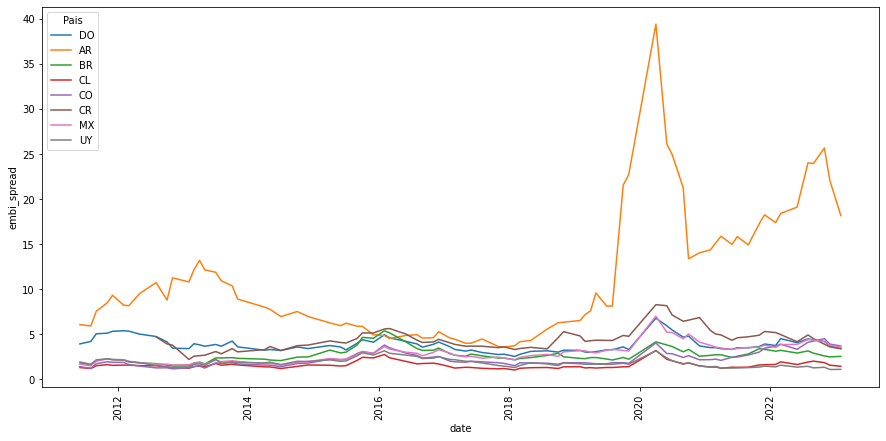

In [30]:
plt.figure(figsize = (15,7))
sns.lineplot(data = df_merge_shorter, x = 'date', y= 'embi_spread', hue = 'Pais')
plt.xticks(rotation = 90)
plt.show()

In [31]:
df_merge_shorter['log_FX'] = np.log(df_merge_shorter['FX'])
df_merge_shorter['log_DXY'] = np.log(df_merge_shorter['DXY'])

In [32]:
df_merge_short.columns

Index(['ix', 'embi_spread', 'log', 'trend', 'cycle', 'FX', 'date', 'Pais'], dtype='object')

In [33]:
df_merge_shorter['Pais'].unique()

array(['DO', 'AR', 'BR', 'CL', 'CO', 'CR', 'MX', 'UY'], dtype=object)

In [34]:
df_merge_shorter.to_excel('bd_riesgo_social.xlsx')

In [35]:
df_merge_short_col = df_merge_shorter[df_merge_shorter['Pais'] == 'CO']

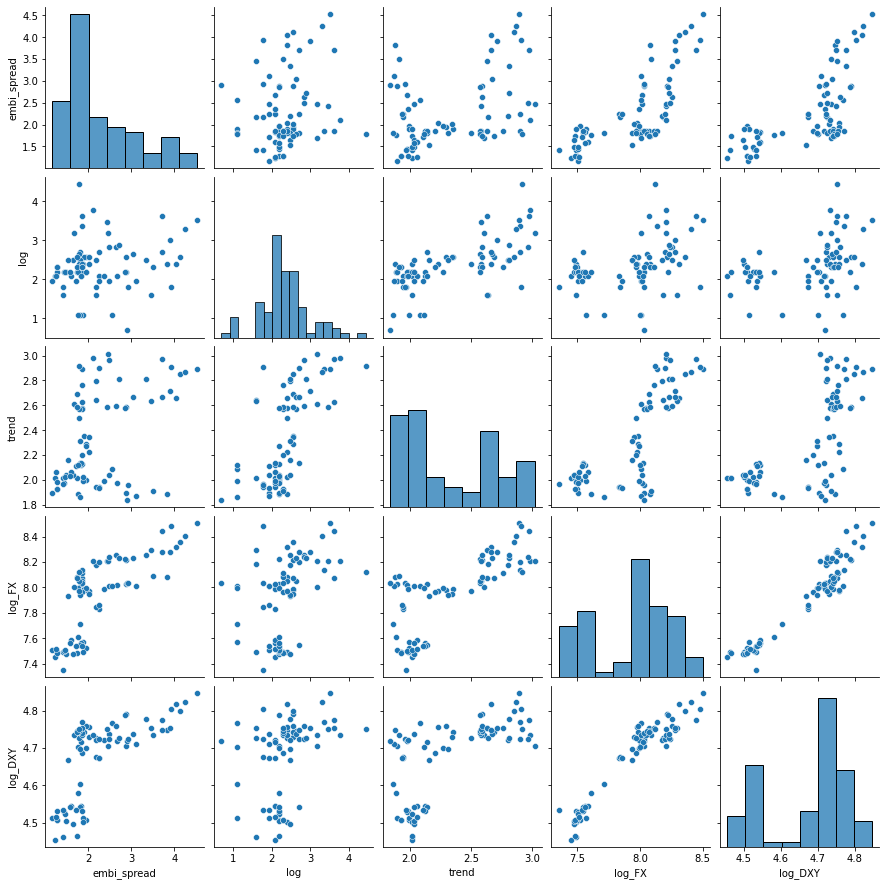

In [36]:
sns.pairplot(df_merge_short_col[[ 'embi_spread', 'log','trend', 'log_FX', 'log_DXY']])
plt.show()

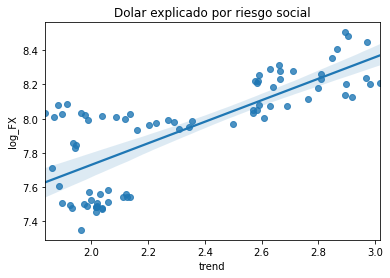

In [37]:
sns.regplot(data = df_merge_short_col, x = 'trend', y ='log_FX')
plt.title('Dolar explicado por riesgo social')
plt.show()

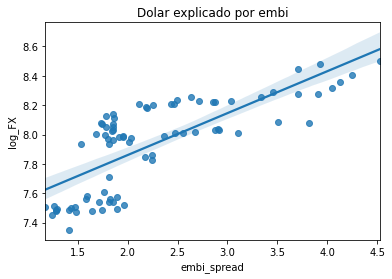

In [38]:
sns.regplot(data = df_merge_short_col, x = 'embi_spread', y ='log_FX')
plt.title('Dolar explicado por embi')
plt.show()

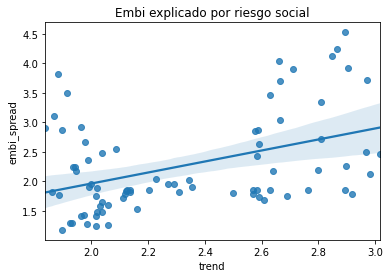

In [39]:
sns.regplot(data = df_merge_short_col, x = 'trend', y ='embi_spread')
plt.title('Embi explicado por riesgo social')
plt.show()

In [43]:
import statsmodels.api as sm
y = df_merge_short_col['log_FX']
X = df_merge_short_col[['trend', 'log_DXY']]
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_FX   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     616.2
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           4.20e-48
Time:                        14:18:49   Log-Likelihood:                 94.790
No. Observations:                  80   AIC:                            -183.6
Df Residuals:                      77   BIC:                            -176.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1217      0.446     -6.992      0.000      -4.011      -2.233
trend          0.1989      0.030      6.589      0.000       0.139       0.259
log_DXY        2.2669      0.105     21.649      0.000       2.058       2.475
==============================================================================
Omnibus:                        2.574   Durbin-Watson:                   0.426
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.297
Skew:                          -0.315   Prob(JB):                        0.317
Kurtosis:                       2.460   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""